In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
program_data=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

## Number of Unique Companies

In [56]:
unique_companies=len(pd.unique(program_data['Company Name']))
print('There are '+str(unique_companies)+' companies represented in the data set.')

There are 439 companies represented in the data set.


## Number of jobs created for business in Queens

In [60]:
queens_created=program_data[program_data['Borough']=='Queens']['Job created'].sum()
print('The total number of jobs created for businesses in Queens is '+str(queens_created)+'.')

The total number of jobs created for businesses in Queens is 102.0.


## Number of unique email domain names

In [61]:
def domain(row):
    email=str(row['company email'])
    if '@' in email:
        return email.split('@')[1]
    else:
        return 'None'

In [63]:
program_data['domain']=program_data.apply(lambda row: domain(row),axis=1)
# Don't count None as a unique domain name, 
# so count unique names and subtract 1.
email_domains=len(pd.unique(program_data['domain']))-1
print('There are '+str(email_domains)+' unique email domain names in the data set.')

There are 356 unique email domain names in the data set.


## Average total savings and total jobs created for NTAs with at least 5 businesses

In [67]:
NTA_Data=pd.DataFrame(columns={'NTA','Total Jobs Created','Average Total Savings','Number of Businesses'})
NTA_Data['NTA']=program_data.groupby(['NTA'])['Job created'].sum().reset_index()['NTA']
NTA_Data['Total Jobs Created']=program_data.groupby(['NTA'])['Job created'].sum().reset_index()['Job created']
NTA_Data['Average Total Savings']=program_data.groupby(['NTA'])['Total Savings'].mean().reset_index()['Total Savings']
NTA_Data['Number of Businesses']=program_data.groupby(['NTA'])['Company Name'].count().reset_index()['Company Name']
NTA_Data=NTA_Data[NTA_Data['Number of Businesses']>4]

In [68]:
compression_opts = dict(method='zip',archive_name='NTA_Data.csv')  
NTA_Data.to_csv('out.zip', index=False,compression=compression_opts) 

## Scatterplots of jobs created vs total savings for whole data set

<Figure size 432x288 with 0 Axes>

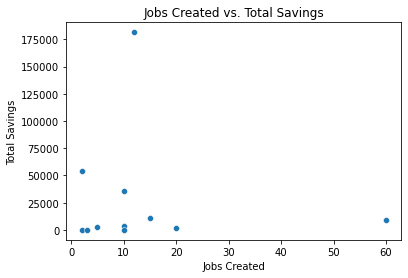

In [99]:
plt.clf()
plt.figure()
ax=sns.scatterplot(data=program_data,x='Job created',y='Total Savings')
plt.title('Jobs Created vs. Total Savings')
plt.xlabel('Jobs Created')
plt.ylabel('Total Savings')
plt.show()

<Figure size 432x288 with 0 Axes>

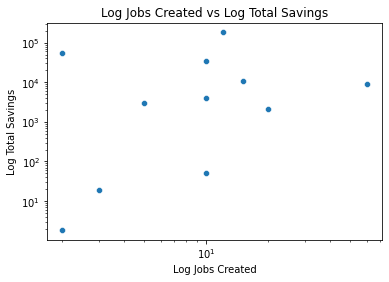

In [100]:
plt.clf()
plt.figure()
splot=sns.scatterplot(data=program_data,x='Job created', y='Total Savings')
splot.set(xscale='log',yscale='log')
plt.title('Log Jobs Created vs Log Total Savings')
plt.xlabel('Log Jobs Created')
plt.ylabel('Log Total Savings')
#plt.xlim(1,40)
plt.show()

## Scatterplots of jobs created vs average savings for NTAs with at least 5 businesses

<Figure size 432x288 with 0 Axes>

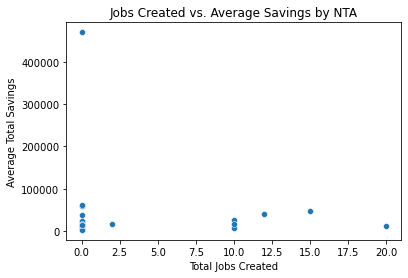

In [72]:
plt.clf()
plt.figure()
ax=sns.scatterplot(data=NTA_Data,x='Total Jobs Created',y='Average Total Savings')
plt.title('Jobs Created vs. Average Savings by NTA')
plt.show()


<Figure size 432x288 with 0 Axes>

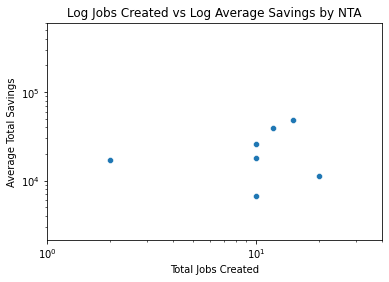

In [80]:
plt.clf()
plt.figure()
splot=sns.scatterplot(data=NTA_Data,x='Total Jobs Created', y='Average Total Savings')
splot.set(xscale='log',yscale='log')
plt.title('Log Jobs Created vs Log Average Savings by NTA')
plt.xlim(1,40)
plt.show()

## Histogram of the log of total savings for total data set

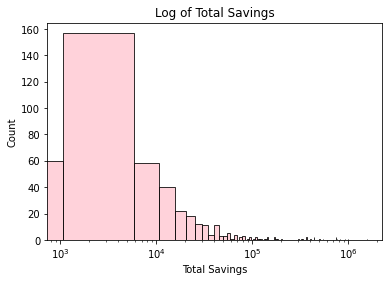

In [101]:
plt.clf
plt.figure
shist=sns.histplot(data=program_data,x='Total Savings',color='pink',alpha=.7,linewidth=.8)
shist.set(xscale='log')
plt.title('Log of Total Savings')
plt.show()

## Histogram of the log of average total savings for NTAs with at least 5 businesses

Text(0.5, 1.0, 'Log of Average Total Savings by NTA')

<Figure size 432x288 with 0 Axes>

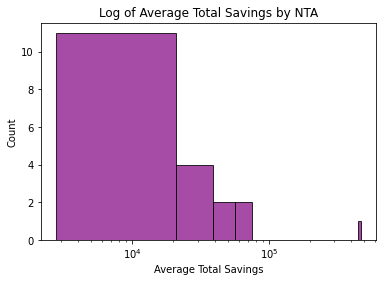

In [98]:
plt.clf()
plt.figure()
shist=sns.histplot(data=NTA_Data,x='Average Total Savings',color='purple',alpha=.7,linewidth=.8)
shist.set(xscale='log')
plt.title('Log of Average Total Savings by NTA')
plt.show()

## Line plot of total jobs created for each month for whole data set

In [102]:
program_data['Effective Date']=pd.DatetimeIndex(program_data['Effective Date'])
program_data['Month'] = pd.to_datetime(program_data['Effective Date'], format='%Y-%m').dt.strftime('%Y-%m')
Jobs_by_Month=program_data.groupby('Month')['Job created'].sum().reset_index()


<Figure size 432x288 with 0 Axes>

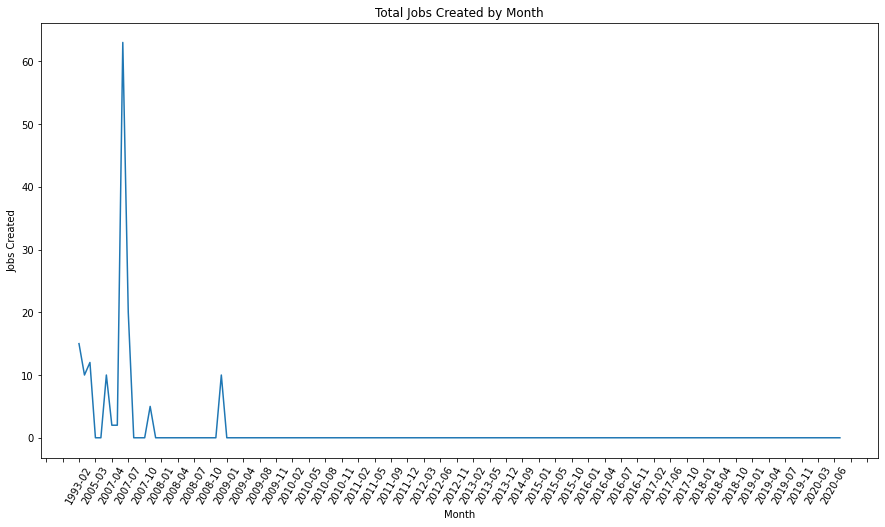

In [103]:
plt.clf()
plt.figure(figsize=(15,8))
lplot=sns.lineplot(data=Jobs_by_Month,x='Month',y='Job created')
lplot.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Jobs Created')
plt.title('Total Jobs Created by Month')
plt.show()